In [1]:
""" Draw plots from mgg_prophages output table (prophages.tsv) """

from pathlib import Path
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import string
sns.set(font_scale=1.5)


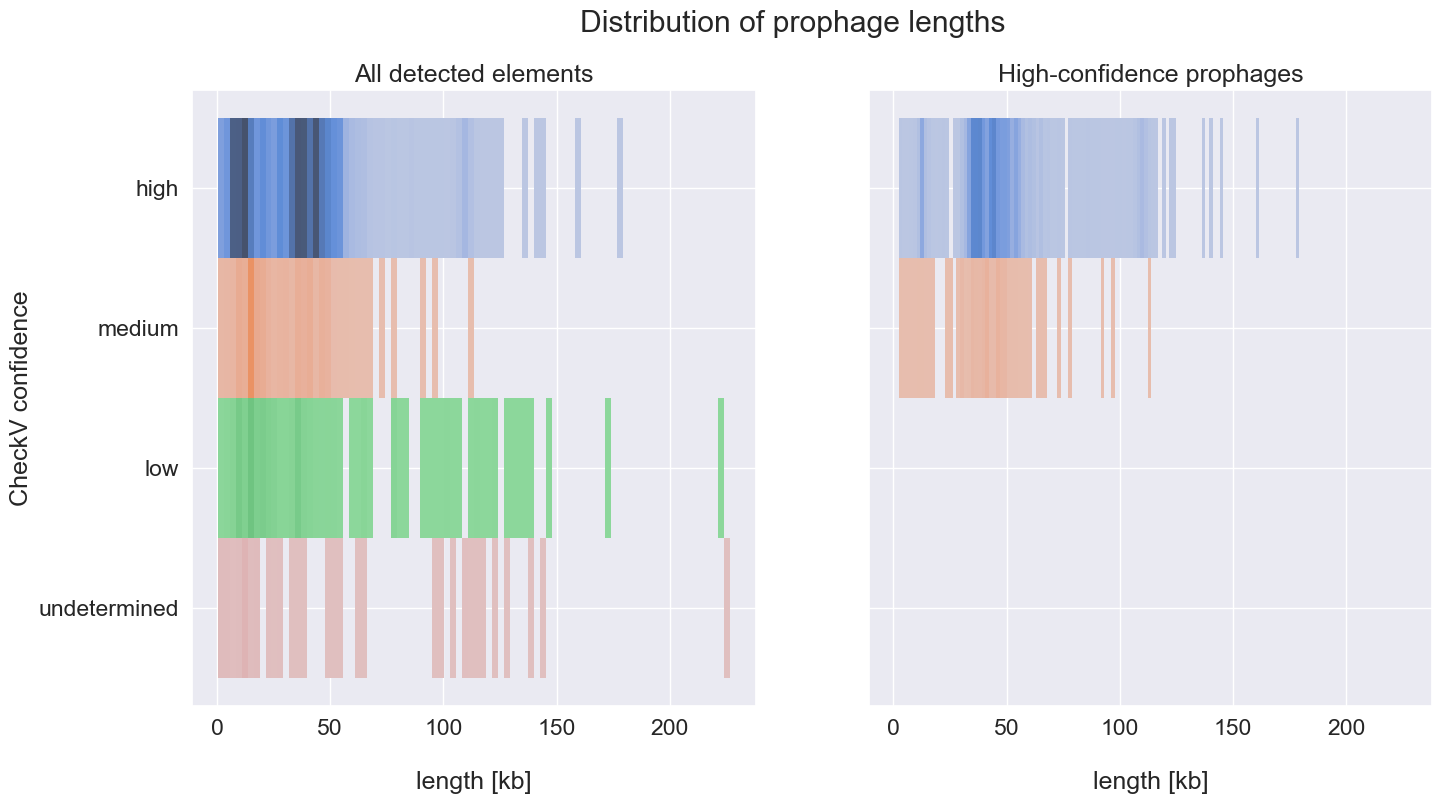

In [17]:
def get_numbers(df):
    ## prophages lenght per confidence
    nconfidence_df = df.groupby('confidence').size()
    nhigh, nmedium = nconfidence_df['high'], nconfidence_df['medium']

    try: nlow, nundetermined = nconfidence_df['low'], nconfidence_df['undetermined']
    except: nlow, nundetermined = 0, 0
    
    return nhigh, nmedium, nlow, nundetermined

work_dir = '/Users/januszkoszucki/MGG Dropbox/Janusz Koszucki/working_dir/DATA/KASPAH_KLEBPAVIAP1'
prophages_table = Path(work_dir, 'prophages.tsv')
output_dir = Path(work_dir, 'plots')

# create output folder
output_dir.mkdir(exist_ok=True, parents=True)

# load table
df = pd.read_csv(prophages_table, sep='\t')

filt1 = df['completeness'] >= 95
filt2 = (df['confidence'] == 'medium') | (df['confidence'] == 'high')
filt_high = filt1 & filt2

# calculate length
df['length [kb]'] = df['seq'].str.len() / 1000

fig, axes = plt.subplots(1,2, figsize=(16,8), sharex=True, sharey=True)
fig.suptitle('Distribution of prophage lengths')

nhigh, nmedium, nlow, nundetermined = get_numbers(df)
sns.histplot(data=df, x='length [kb]', y='confidence', hue='confidence', legend=False, ax=axes[0])
axes[0].set_title(f"All detected elements") # \n nhigh={nhigh}  nmedium={nmedium}  nlow={nlow}  nundetermined={nundetermined} 
axes[0].set_ylabel('CheckV confidence')
axes[0].set_xlabel('\nlength [kb]')

nhigh, nmedium, nlow, nundetermined = get_numbers(df.loc[filt_high])
sns.histplot(data=df.loc[filt_high], x='length [kb]', y='confidence', hue='confidence', legend=False, ax=axes[1], vmax=600) 
axes[1].set_title(f"High-confidence prophages") # \n nhigh={nhigh}  nmedium={nmedium}  nlow={nlow}  nundetermined={nundetermined} 
axes[1].set_xlabel('\nlength [kb]')

plt.savefig(Path(output_dir, 'length_per_confidence.png'))

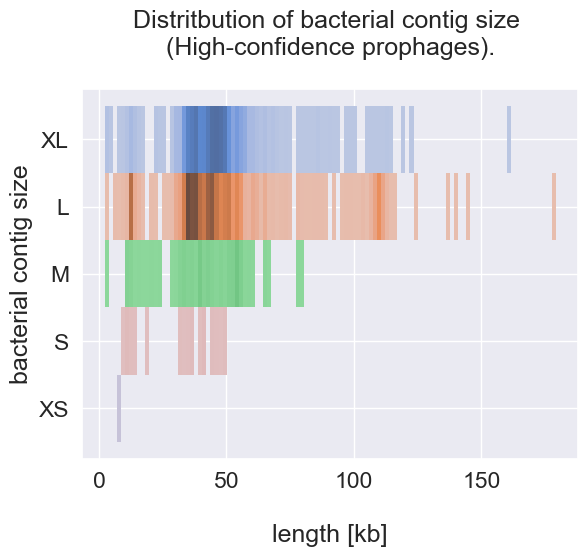

In [5]:
df = df.loc[filt_high]

### prophages lenght per contig size
fig = plt.figure()
df['contig_size'] = df.apply(lambda row: row['contigID'].split('_')[-1].strip(string.digits), axis=1)
ncontig_size_df = df.groupby('contig_size').size()
nxl, nl, nm, ns, nxs = ncontig_size_df['XL'], ncontig_size_df['L'], ncontig_size_df['M'], ncontig_size_df['S'], ncontig_size_df['XS']

sns.histplot(data=df, x='length [kb]', y='contig_size', hue='contig_size', legend=False) # , cbar=True
plt.title(f"Distritbution of bacterial contig size \n(High-confidence prophages).\n") #\n nxl={nxl}  nl={nl}  nm={nm}  ns={ns}   nxs={nxs} 
plt.xlabel('\nlength [kb]')
plt.ylabel('bacterial contig size')
plt.savefig(Path(output_dir, 'length_per_contigsize.png'))
